![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

# TFM - Clustering

# *1. Librerías*

In [3]:
# Principales librerias
import pandas as pd
import numpy as np

# Visuzalizaciones
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.figure_factory as ff

# Forzar la recolección de basura
import gc
gc.collect()

# Configuración de las visualizaciones
pd.set_option('display.max_info_columns', 110 )
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', 80)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_colwidth', None)

# Modelos
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.cluster.hierarchy as sch

# *2. Carga de datos*

In [4]:
df = pd.read_csv("./data/dfCluster1.csv", index_col=False, low_memory=False)

# *3. Exploración de datos*

In [5]:
print(f"El DataFrame 'df' tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

El DataFrame 'df' tiene 9870 filas y 72 columnas.


In [6]:
df.head(2)

,m2_constr,cod_distrito,cod_barrio,estado,amueblado,planta,codigo_postal,certificado_energetico,orientacion_este,orientacion_oeste,orientacion_sur,orientacion_norte,num_personas,num_personas_hombres,total_transacciones,viv_nuevas_transacciones,lineas_metro,num_lineas_buses,renta_bruta_media_por_persona,habitantes,tamano_medio_del_hogar,tamaño_del_hogar_(nº_de_personas_en_la_vivienda),hog_con_10,hog_con_15_y_más,m2_areasverdes,ins_comunitaria,energia,eficiencia_carpinteria,cod_barrio_group,tipologia_Atico,tipologia_Casa,tipologia_Chalet,tipologia_Duplex,tipologia_Estudio,tipologia_Piso,antiguedad_Desconocido,antiguedad_Entre 10 y 30 años,antiguedad_Entre 30 y 50 años,antiguedad_Entre 5 y 10 años,antiguedad_Menos de 5 años,antiguedad_Más de 50 años,tipo_inmueble_Desconocido,tipo_inmueble_económico,tipo_inmueble_lujo,tipo_inmueble_medio,tipo_inmueble_señorial,clasificacion_aire_Desconocido,clasificacion_aire_Eficiente,clasificacion_aire_Normal,clasificacion_aire_Sin Aire,tipo_suelo_Baldosa,tipo_suelo_Desconocido,tipo_suelo_Gres,tipo_suelo_Madera,tipo_suelo_Otros,tipo_suelo_Piedra,tipo_suelo_Radiante,grupo_cocina_Abierta,grupo_cocina_Amueblada,grupo_cocina_Desconocido,grupo_cocina_Equipada,grupo_cocina_Independiente,grupo_cocina_Isla,grupo_cocina_No amueblada,grupo_cocina_Reformada,grupo_cocina_Sin reforma,total_estaciones,habitaciones,atrib_lujo,atrib,serv_barrio,target
0,0.05,0.88,0.81,-0.50,0.00,2.50,0.04,0.00,0.00,0.00,0.00,0.00,0.87,0.91,0.02,1.12,-1.25,0.00,-0.80,1.63,0.77,0.16,1.95,0.55,0.80,0.00,0.00,0.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.05,0.33,1.00,0.00,-0.90,-0.31
1,0.00,0.12,0.10,-0.50,0.10,1.00,-0.30,1.00,0.00,0.00,0.00,0.00,-0.28,-0.37,0.00,0.73,0.75,0.00,0.58,-0.13,-0.51,0.11,-0.54,0.00,-0.35,0.00,0.00,0.00,0.33,1.00,0.00,0.00,0.00,0.00,-1.00,-1.00,0.00,1.00,0.00,0.00,0.00,-1.00,0.00,1.00,0.00,0.00,-1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.35,0.00,0.00,1.05,1.48,0.34


In [7]:
df.columns

Index(['m2_constr', 'cod_distrito', 'cod_barrio', 'estado', 'amueblado',
       'planta', 'codigo_postal', 'certificado_energetico', 'orientacion_este',
       'orientacion_oeste', 'orientacion_sur', 'orientacion_norte',
       'num_personas', 'num_personas_hombres', 'total_transacciones',
       'viv_nuevas_transacciones', 'lineas_metro', 'num_lineas_buses',
       'renta_bruta_media_por_persona', 'habitantes', 'tamano_medio_del_hogar',
       'tamaño_del_hogar_(nº_de_personas_en_la_vivienda)', 'hog_con_10',
       'hog_con_15_y_más', 'm2_areasverdes', 'ins_comunitaria', 'energia',
       'eficiencia_carpinteria', 'cod_barrio_group', 'tipologia_Atico',
       'tipologia_Casa', 'tipologia_Chalet', 'tipologia_Duplex',
       'tipologia_Estudio', 'tipologia_Piso', 'antiguedad_Desconocido',
       'antiguedad_Entre 10 y 30 años', 'antiguedad_Entre 30 y 50 años',
       'antiguedad_Entre 5 y 10 años', 'antiguedad_Menos de 5 años',
       'antiguedad_Más de 50 años', 'tipo_inmueble_Desconoc

Observaciones:
- El DataFrame contiene 9,870 filas y 72 columnas.
- Nombre de columnas: Hay columnas con nombres largos y espacios en blanco, como: `tamaño_del_hogar_(nº_de_personas_en_la_vivienda)`, `antiguedad_Entre 10 y 30 años`, `antiguedad_Entre 30 y 50 años`, `antiguedad_Entre 5 y 10 años`, `antiguedad_Menos de 5 años`, `antiguedad_Más de 50 años`. Se recomienda renombrarlas para facilitar su uso en el código.

In [8]:
# Renombrar columnas con nombres largos o con caracteres problemáticos
df.rename(columns={
    "tamaño_del_hogar_(nº_de_personas_en_la_vivienda)": "tam_hogar",
    "antiguedad_Entre 10 y 30 años": "ant_10_30",
    "antiguedad_Entre 30 y 50 años": "ant_30_50",
    "antiguedad_Entre 5 y 10 años": "ant_5_10",
    "antiguedad_Menos de 5 años": "ant_menos_5",
    "antiguedad_Más de 50 años": "ant_mas_50"
}, inplace=True)

# Verificar cambios
df.columns

Index(['m2_constr', 'cod_distrito', 'cod_barrio', 'estado', 'amueblado',
       'planta', 'codigo_postal', 'certificado_energetico', 'orientacion_este',
       'orientacion_oeste', 'orientacion_sur', 'orientacion_norte',
       'num_personas', 'num_personas_hombres', 'total_transacciones',
       'viv_nuevas_transacciones', 'lineas_metro', 'num_lineas_buses',
       'renta_bruta_media_por_persona', 'habitantes', 'tamano_medio_del_hogar',
       'tam_hogar', 'hog_con_10', 'hog_con_15_y_más', 'm2_areasverdes',
       'ins_comunitaria', 'energia', 'eficiencia_carpinteria',
       'cod_barrio_group', 'tipologia_Atico', 'tipologia_Casa',
       'tipologia_Chalet', 'tipologia_Duplex', 'tipologia_Estudio',
       'tipologia_Piso', 'antiguedad_Desconocido', 'ant_10_30', 'ant_30_50',
       'ant_5_10', 'ant_menos_5', 'ant_mas_50', 'tipo_inmueble_Desconocido',
       'tipo_inmueble_económico', 'tipo_inmueble_lujo', 'tipo_inmueble_medio',
       'tipo_inmueble_señorial', 'clasificacion_aire_Desco

Observaciones:
Ahora los nombres son:
- "tamaño_del_hogar_(nº_de_personas_en_la_vivienda)" → "tam_hogar"
- "antiguedad_Entre 10 y 30 años" → "ant_10_30"
- "antiguedad_Entre 30 y 50 años" → "ant_30_50"
- "antiguedad_Entre 5 y 10 años" → "ant_5_10"
- "antiguedad_Menos de 5 años" → "ant_menos_5"
- "antiguedad_Más de 50 años" → "ant_mas_50"

In [9]:
# Identificar los tipos de datos en el dataset
tipos_de_datos = df.dtypes.value_counts()

print(f"El DataFrame 'df' tiene los siguientes tipos de datos:\n{tipos_de_datos}.")

El DataFrame 'df' tiene los siguientes tipos de datos:
float64    72
Name: count, dtype: int64.


Observaciones:
- Tipos de datos homogéneos: Todas las columnas son de tipo float64, lo que es inusual para datos categóricos. Posiblemente algunas variables deberían ser categorical o int. Revisa especialmente:
    - `cod_distrito`, `cod_barrio`, `codigo_postal`
    - Variables binarias como `amueblado`, `estado`, `certificado_energetico`, `tipologia_`, etc.

In [10]:
# Identificar columnas categóricas y binarias que deben ser convertidas a 'int'
columnas_binarias = [
    "amueblado", "orientacion_este", "orientacion_oeste", "orientacion_sur", "orientacion_norte",
    "tipologia_Atico", "tipologia_Casa", "tipologia_Chalet", "tipologia_Duplex", "tipologia_Estudio", "tipologia_Piso",
    "antiguedad_Desconocido", "ant_10_30", "ant_30_50", "ant_5_10", "ant_menos_5", "ant_mas_50",
    "tipo_inmueble_Desconocido", "tipo_inmueble_económico", "tipo_inmueble_lujo", "tipo_inmueble_medio", "tipo_inmueble_señorial",
    "clasificacion_aire_Desconocido", "clasificacion_aire_Eficiente", "clasificacion_aire_Normal", "clasificacion_aire_Sin Aire",
    "tipo_suelo_Baldosa", "tipo_suelo_Desconocido", "tipo_suelo_Gres", "tipo_suelo_Madera", "tipo_suelo_Otros",
    "tipo_suelo_Piedra", "tipo_suelo_Radiante", "grupo_cocina_Abierta", "grupo_cocina_Amueblada",
    "grupo_cocina_Desconocido", "grupo_cocina_Equipada", "grupo_cocina_Independiente", "grupo_cocina_Isla",
    "grupo_cocina_No amueblada", "grupo_cocina_Reformada", "grupo_cocina_Sin reforma"
]

columnas_categoricas = ["cod_distrito", "cod_barrio", "codigo_postal", "estado", "certificado_energetico"]

# Convertir a tipo 'int'
df[columnas_binarias] = df[columnas_binarias].astype(int)
df[columnas_categoricas] = df[columnas_categoricas].astype(int)

# Verificar cambios en los tipos de datos
tipos_actualizados = df.dtypes[columnas_binarias + columnas_categoricas]
tipos_actualizados

amueblado                         int64
orientacion_este                  int64
orientacion_oeste                 int64
orientacion_sur                   int64
orientacion_norte                 int64
tipologia_Atico                   int64
tipologia_Casa                    int64
tipologia_Chalet                  int64
tipologia_Duplex                  int64
tipologia_Estudio                 int64
tipologia_Piso                    int64
antiguedad_Desconocido            int64
ant_10_30                         int64
ant_30_50                         int64
ant_5_10                          int64
ant_menos_5                       int64
ant_mas_50                        int64
tipo_inmueble_Desconocido         int64
tipo_inmueble_económico           int64
tipo_inmueble_lujo                int64
tipo_inmueble_medio               int64
tipo_inmueble_señorial            int64
clasificacion_aire_Desconocido    int64
clasificacion_aire_Eficiente      int64
clasificacion_aire_Normal         int64


In [11]:
# Verificar los tipos de datos en el dataset
tipos_de_datos = df.dtypes.value_counts()

print(f"El DataFrame 'df' tiene los siguientes tipos de datos:\n{tipos_de_datos}.")

El DataFrame 'df' tiene los siguientes tipos de datos:
int64      47
float64    25
Name: count, dtype: int64.


In [12]:
# Verificar valores nulos por columna
valores_nulos = df.isnull().sum().sort_values(ascending=False)

print(f"El DataFrame 'df' tiene los siguientes valores nulos por columna:\n{valores_nulos}.")

El DataFrame 'df' tiene los siguientes valores nulos por columna:
tipo_suelo_Radiante               0
grupo_cocina_Abierta              0
grupo_cocina_Amueblada            0
grupo_cocina_Desconocido          0
grupo_cocina_Equipada             0
grupo_cocina_Independiente        0
grupo_cocina_Isla                 0
grupo_cocina_No amueblada         0
orientacion_este                  0
orientacion_oeste                 0
orientacion_sur                   0
orientacion_norte                 0
num_personas                      0
num_personas_hombres              0
total_transacciones               0
viv_nuevas_transacciones          0
lineas_metro                      0
num_lineas_buses                  0
renta_bruta_media_por_persona     0
habitantes                        0
tamano_medio_del_hogar            0
tam_hogar                         0
hog_con_10                        0
hog_con_15_y_más                  0
m2_areasverdes                    0
ins_comunitaria                   

Observaciones:
- No hay valores nulos en ninguna columna, lo cual facilita el preprocesamiento.

In [13]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
m2_constr,9870.00,0.49,1.84,-1.06,-0.36,0.00,0.63,53.93
cod_distrito,9870.00,0.19,0.39,0.00,0.00,0.00,0.00,1.00
cod_barrio,9870.00,0.18,0.38,0.00,0.00,0.00,0.00,1.00
estado,9870.00,0.26,0.55,0.00,0.00,0.00,0.00,2.00
amueblado,9870.00,0.10,0.30,0.00,0.00,0.00,0.00,1.00
planta,9870.00,0.30,1.11,-1.50,-0.50,0.00,0.50,12.50
codigo_postal,9870.00,0.15,0.36,0.00,0.00,0.00,0.00,1.00
certificado_energetico,9870.00,0.19,0.39,0.00,0.00,0.00,0.00,1.00
orientacion_este,9870.00,0.06,0.24,0.00,0.00,0.00,0.00,1.00
orientacion_oeste,9870.00,0.05,0.22,0.00,0.00,0.00,0.00,1.00


Cuando una variable categórica se representa con números flotantes, los algoritmos de machine learning pueden interpretarla de manera incorrecta, asumiendo que existe una relación continua o una jerarquía entre los valores, cuando en realidad representan categorías independientes.

Ejemplo:
- Si `cod_distrito` tiene valores como 1.0, 2.0, 3.0, un modelo podría asumir que 3.0 es tres veces más grande o importante que 1.0, lo cual no tiene sentido en una variable categórica.
- Convertirlo a int (1, 2, 3 sin decimales) indica que estos valores son simplemente identificadores y no tienen relación de magnitud entre ellos.

Impacto en Clustering. Si las variables categóricas están en formato flotante:
- K-Means o cualquier métrica basada en distancia podría calcular distancias erróneas y generar clusters distorsionados.
- Algoritmos jerárquicos y DBSCAN podrían malinterpretar la similitud entre categorías.

In [14]:
# Revisamos el escalado y normalización de datos

# Calcular media y desviación estándar de las variables numéricas
resumen_escalado = df.select_dtypes(include=['number']).agg(['mean', 'std']).T

# Mostrar el resumen
resumen_escalado

,mean,std
m2_constr,0.49,1.84
cod_distrito,0.19,0.39
cod_barrio,0.18,0.38
estado,0.26,0.55
amueblado,0.10,0.30
planta,0.30,1.11
codigo_postal,0.15,0.36
certificado_energetico,0.19,0.39
orientacion_este,0.06,0.24
orientacion_oeste,0.05,0.22


Observaciones:
- Las variables no están completamente estandarizadas.
- La media de las variables debe estar cerca de 0. Algunas tienen medias alejadas de 0 (`m2_constr` = 0.49).
- La desviación estándar debería estar alrededor de 1. Otras variables tienen desviaciones estándar distintas a 1 (`cod_distrito` = 0.39, `estado` = 0.55).
- Las variables categóricas convertidas a int no deben ser escaladas: cod_distrito, cod_barrio, estado, amueblado son categóricas.
- Es posible que haya valores extremos. Algunas variables podrían tener outliers que afecten la estandarización. Solución: Revisar distribución con histogramas o df.describe().

In [15]:
# Identificar variables numéricas continuas (excluyendo las categóricas)
variables_continuas = df.select_dtypes(include=['number']).columns.difference([
    "cod_distrito", "cod_barrio", "codigo_postal", "estado", "certificado_energetico"
])

# Aplicar StandardScaler solo a las variables numéricas continuas
scaler = StandardScaler()
df[variables_continuas] = scaler.fit_transform(df[variables_continuas])

# Verificar la media y desviación estándar tras la corrección
resumen_escalado_corregido = df[variables_continuas].agg(['mean', 'std']).T

# Aplicar formato de 20 decimales en cada columna
resumen_escalado_corregido = resumen_escalado_corregido.map(lambda x: f"{x:.20f}")

# Mostrar resultados
resumen_escalado_corregido

,mean,std
amueblado,-0.00000000000000001584,1.00005066241113005354
ant_10_30,-0.00000000000000004139,1.00005066241101481239
ant_30_50,-0.00000000000000001638,1.00005066241110829317
ant_5_10,-0.00000000000000003096,1.00005066241108453440
ant_mas_50,-0.00000000000000000900,1.00005066241095197377
ant_menos_5,-0.00000000000000004103,1.00005066241107898328
antiguedad_Desconocido,0.00000000000000001980,1.00005066241107032354
atrib,-0.00000000000000000972,1.00005066241103990343
atrib_lujo,0.00000000000000000522,1.00005066241105855518
clasificacion_aire_Desconocido,0.00000000000000001134,1.00005066241113937942


Observaciones:
- La media está cerca de 0, y la desviación estándar cerca de 1, lo que confirma que la normalización es correcta.

# *4. Correlación de variables*

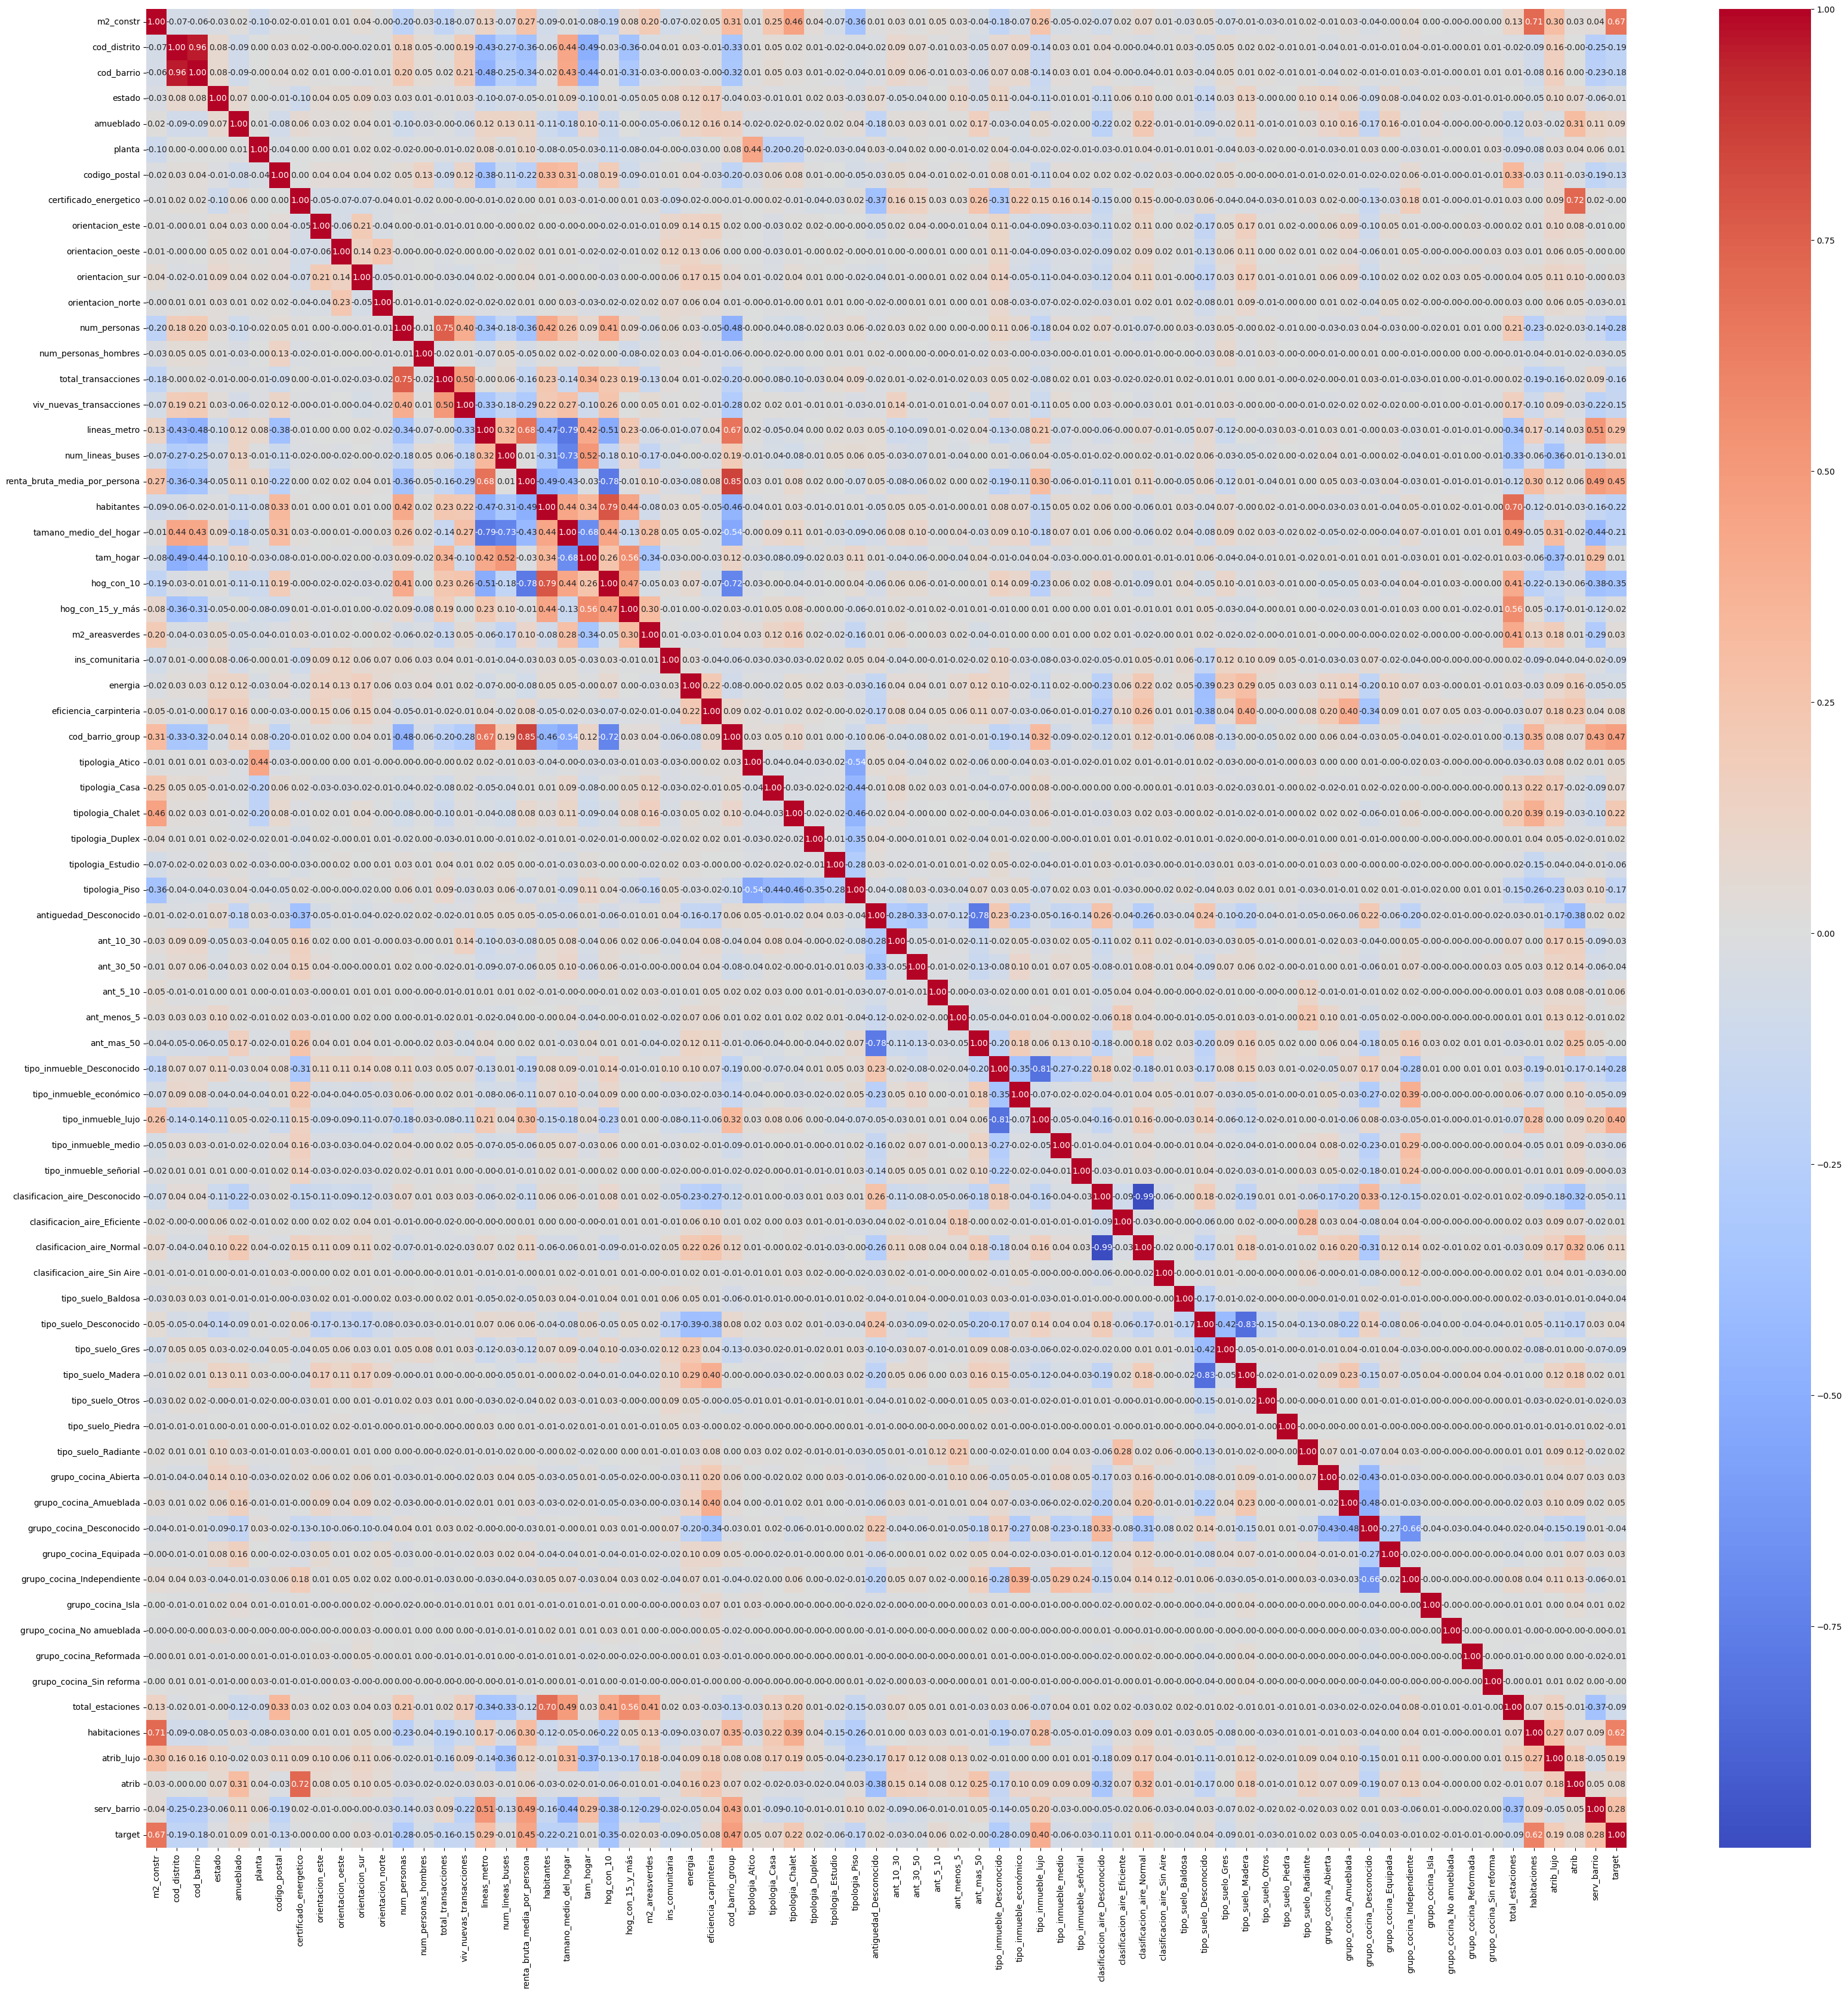

In [16]:
# Calcular la matriz de correlación
matriz_correlacion = df.corr()

plt.figure(figsize=(40, 40)) # Configurar el tamaño de la figura
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f",cmap='coolwarm') # Crear el heatmap de correlación
plt.show() # Mostrar la gráfica

Observaciones:
- Se pueden identificar grupos de variables altamente correlacionadas, lo que sugiere posibles redundancias.
- Si hay variables con correlaciones mayores a 0.8 o menores a -0.8, podríamos considerar eliminar una de ellas para evitar colinealidad.
- También podemos hacer un análisis de componentes principales (PCA) si queremos reducir la dimensionalidad.

In [17]:
# Identificar variables con correlación fuerte (mayor a 0.8 o menor a -0.8)
correlacion_alta = {}

umbral = 0.8  # Umbral para considerar correlación fuerte
for columna in matriz_correlacion.columns:
    correlaciones_fuertes = matriz_correlacion[columna][(matriz_correlacion[columna] > umbral) | (matriz_correlacion[columna] < -umbral)].index.tolist()
    correlaciones_fuertes.remove(columna)  # Eliminar la variable en sí misma
    if correlaciones_fuertes:
        correlacion_alta[columna] = correlaciones_fuertes

# Convertir en DataFrame para visualización
df_correlacion_alta = pd.DataFrame(list(correlacion_alta.items()), columns=["Variable", "Altamente Correlacionada con"])

# Mostrar los resultados
df_correlacion_alta


,Variable,Altamente Correlacionada con
0,cod_distrito,[cod_barrio]
1,cod_barrio,[cod_distrito]
2,renta_bruta_media_por_persona,[cod_barrio_group]
3,cod_barrio_group,[renta_bruta_media_por_persona]
4,tipo_inmueble_Desconocido,[tipo_inmueble_lujo]
5,tipo_inmueble_lujo,[tipo_inmueble_Desconocido]
6,clasificacion_aire_Desconocido,[clasificacion_aire_Normal]
7,clasificacion_aire_Normal,[clasificacion_aire_Desconocido]
8,tipo_suelo_Desconocido,[tipo_suelo_Madera]
9,tipo_suelo_Madera,[tipo_suelo_Desconocido]


Observaciones
- `cod_distrito` y `cod_barrio` están altamente correlacionados, lo cual indica que podrían estar representando información redundante. Evaluar si ambos son necesarios o si uno puede ser eliminado.
- `renta_bruta_media_por_persona` está fuertemente correlacionada con `cod_barrio_group`. Podría indicar que los grupos de barrios se diferencian principalmente por renta. Si es redundante, se puede descartar una.
- `tipo_inmueble_Desconocido` y `tipo_inmueble_lujo` tienen una fuerte relación. Revisar si la categoría "Desconocido" está capturando información similar a la de "lujo".

In [18]:
# Seleccionar solo las variables numéricas continuas para calcular VIF
X_vif = df[variables_continuas].dropna()  # Asegurar que no haya valores nulos

# Calcular VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Mostrar los resultados
vif_data

/opt/anaconda3/envs/Nuclio/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide



,Variable,VIF
0,amueblado,1.25
1,ant_10_30,inf
2,ant_30_50,inf
3,ant_5_10,inf
4,ant_mas_50,inf
5,ant_menos_5,inf
6,antiguedad_Desconocido,inf
7,atrib,1.43
8,atrib_lujo,1.66
9,clasificacion_aire_Desconocido,inf


In [19]:
# # Eliminar variables con VIF infinito
# variables_a_eliminar = ["ant_10_30", "ant_30_50", "ant_5_10", "ant_mas_50"]
# df.drop(columns=variables_a_eliminar, inplace=True)

# # Verificar que se eliminaron correctamente
# df.columns

En Clustering, el "Análisis de Componentes Principales" o PCA es últil por:
- Reducción de dimensionalidad → Podemos eliminar variables redundantes, conservando solo los PCs más importantes.
- Elimina colinealidad → Como los PCs son independientes entre sí, se evita el problema de variables altamente correlacionadas.
- Mejora el rendimiento → Un clustering sobre PCs puede ser más preciso y rápido.

Cada PC es una nueva dimensión creada a partir de las variables originales.
- PC1 → Explica la mayor parte de la variabilidad en los datos.
- PC2 → Explica la segunda mayor variabilidad, pero es ortogonal (independiente) a PC1.
- PC3, PC4... → Siguen explicando la variabilidad en orden decreciente.

En PCA, cada componente principal es una combinación lineal y explica un porcentaje de la variabilidad total de los datos. Para elegir cuántos componentes usar, podemos analizar:
- La varianza explicada acumulada que se calcula sumando la varianza explicada por los primeros componentes. Regla común: Elegir el número de PCs que explican al menos el 85%-95% de la varianza.

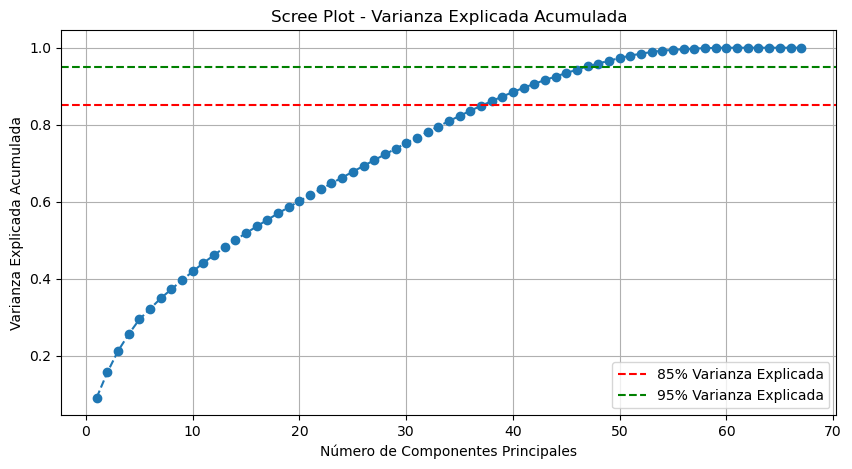

In [20]:
# Aplicar PCA para determinar la importancia de las variables
pca = PCA(n_components=len(variables_continuas))
pca.fit(df[variables_continuas])

# Calcular la varianza explicada por cada componente principal
varianza_explicada = pca.explained_variance_ratio_

# Calcular la varianza explicada acumulada
varianza_acumulada = np.cumsum(varianza_explicada)

# Graficar la varianza explicada acumulada
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', linestyle='--')
plt.axhline(y=0.85, color='r', linestyle='--', label='85% Varianza Explicada')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Varianza Explicada')
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza Explicada Acumulada")
plt.title("Scree Plot - Varianza Explicada Acumulada")
plt.legend()
plt.grid()
plt.show()

Observaciones:
- La curva muestra cuánta varianza se conserva al agregar más componentes principales.
- El "punto de codo" es donde la curva empieza a aplanarse, indicando el número óptimo de componentes.
- Se suele elegir el número de componentes donde se alcanza al menos el 85%-95% de la varianza explicada.

In [21]:
# Determinar el número de componentes que explican al menos el 85% y 95% de la varianza
num_componentes_85 = np.argmax(varianza_acumulada >= 0.85) + 1
num_componentes_95 = np.argmax(varianza_acumulada >= 0.95) + 1

# Mostrar resultados
num_componentes_85, num_componentes_95

(38, 47)

Observaciones:
- 38 componentes principales explican al menos 85% de la varianza.
- 47 componentes principales explican al menos 95% de la varianza.
- Si queremos un buen balance entre reducción de dimensiones y retención de información, podemos usar 38 componentes.
- Si queremos conservar casi toda la información original, podemos usar 47 componentes.

In [22]:
# Aplicar PCA con 38 componentes principales
pca_38 = PCA(n_components=38)
df_pca = pca_38.fit_transform(df[variables_continuas])

# Convertir a DataFrame
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(38)])

# Mostrar las primeras filas del DataFrame transformado
df_pca.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38
0,-4.18,-0.60,0.98,-0.44,-0.52,0.39,-0.07,0.01,0.80,-0.89,0.34,-1.40,-0.78,0.67,-0.21,-0.45,0.04,0.09,0.10,-0.03,0.06,0.06,-0.07,0.10,-0.06,-0.14,-0.03,-0.03,0.02,0.07,-0.19,0.04,0.28,-0.08,-0.20,0.16,0.06,0.16
1,3.44,0.94,0.18,-1.44,1.03,3.00,-2.65,3.29,2.02,-0.89,-1.13,-1.40,0.61,-0.55,-0.02,0.88,1.51,-2.43,0.59,0.28,-0.69,0.33,-0.09,-0.56,0.32,0.51,0.34,-0.37,-0.63,0.10,0.30,-0.72,0.59,0.85,0.76,0.37,-0.31,-0.51
2,1.92,-2.11,-0.17,0.49,-0.11,-0.43,0.14,-1.14,0.08,0.69,0.20,-0.16,-0.10,-0.01,-0.04,0.78,-0.09,-0.16,-0.27,-0.18,0.11,-0.03,-0.15,-0.03,-0.09,0.13,-0.11,-0.11,0.15,-0.23,0.15,0.19,-0.15,0.36,0.76,-0.33,-0.20,-0.12
3,2.80,-2.34,0.01,-2.04,-0.18,-1.07,0.61,1.08,-0.96,-0.93,0.30,-1.20,0.37,-0.57,-0.33,-0.89,1.42,0.61,0.14,0.17,-0.21,-0.10,0.19,0.35,-0.03,0.10,0.30,0.05,-0.22,-0.01,-0.14,-0.43,0.20,-1.25,-0.60,-0.38,0.31,0.44
4,-0.37,-2.09,-0.83,0.64,0.58,-0.17,0.52,-0.23,-0.05,-0.17,0.31,-0.49,-0.25,-0.14,-0.31,0.53,-0.16,0.14,-0.13,-0.11,0.06,-0.02,-0.15,0.07,-0.05,0.10,-0.05,-0.07,0.27,-0.08,0.16,-0.10,0.03,0.04,0.28,-0.27,-0.03,-0.19


Observaciones:
- Hemos reducido la dimensionalidad del dataset a 38 componentes principales, conservando más del 85% de la varianza.
- Ahora podemos continuar con el clustering utilizando este nuevo conjunto de datos.

In [ ]:
# Cargas de cada variable para cada componente
cargas_pca = pd.DataFrame(pca_38.components_, columns=variables_continuas, index=[f'PC{i+1}' for i in range(38)])

# Mostrar las cargas absolutas ordenadas para cada componente (las 5 mayores por componente)
cargas_mayores = {}
for componente in cargas_pca.index:
    cargas_mayores[componente] = cargas_pca.loc[componente].abs().sort_values(ascending=False).head(5).index.tolist()

cargas_mayores_df = pd.DataFrame(cargas_mayores).T
cargas_mayores_df.columns = [f'Variable_{i+1}' for i in range(5)]

# Mostrar resultados
cargas_mayores_df

,Variable_1,Variable_2,Variable_3,Variable_4,Variable_5
PC1,cod_barrio_group,renta_bruta_media_por_persona,hog_con_10,lineas_metro,habitantes
PC2,clasificacion_aire_Desconocido,grupo_cocina_Desconocido,clasificacion_aire_Normal,antiguedad_Desconocido,tipo_suelo_Desconocido
PC3,m2_constr,habitaciones,tipologia_Piso,tamano_medio_del_hogar,tam_hogar
PC4,hog_con_15_y_más,tam_hogar,tipo_inmueble_Desconocido,habitantes,tipo_suelo_Desconocido
PC5,hog_con_15_y_más,tam_hogar,tipo_inmueble_Desconocido,tipo_inmueble_económico,grupo_cocina_Independiente
PC6,tipologia_Atico,tipologia_Piso,planta,total_transacciones,viv_nuevas_transacciones
PC7,total_transacciones,grupo_cocina_Desconocido,num_personas,grupo_cocina_Independiente,tipo_inmueble_lujo
PC8,tipologia_Piso,tipologia_Atico,antiguedad_Desconocido,grupo_cocina_Desconocido,num_lineas_buses
PC9,planta,total_estaciones,m2_areasverdes,hog_con_15_y_más,num_lineas_buses
PC10,clasificacion_aire_Normal,clasificacion_aire_Desconocido,ant_mas_50,antiguedad_Desconocido,tipo_suelo_Desconocido


# *5. Clustering de viviendas*

In [ ]:
# Definir X_escalado como los valores escalados para esas variables continuas
X_escalado = df[variables_continuas].values

X_escalado

array([[-0.32767553, -0.20309869, -0.23630663, ...,  0.9578055 ,
        -0.04363787,  0.15710013],
       [-0.32767553, -0.20309869,  4.23178993, ..., -0.95219876,
        -0.06998932, -0.0349228 ],
       [-0.32767553, -0.20309869, -0.23630663, ..., -0.95219876,
        -0.33350387, -0.49282364],
       ...,
       [-0.32767553, -0.20309869, -0.23630663, ..., -0.4746977 ,
        -0.34404445, -0.0496938 ],
       [-0.32767553, -0.20309869, -0.23630663, ..., -0.4746977 ,
        -0.34404445, -0.0496938 ],
       [-0.32767553, -0.20309869, -0.23630663, ..., -0.95219876,
         0.27784988, -0.53713662]])

## *5.1 Sin eliminar variables*

### *5.1.1 K-Means*

In [30]:
# Rango de clusters a evaluar (desde 2 hasta 12)
inercia = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_escalado)
    inercia = kmeans.inertia_
    inercia.append(inercia)

AttributeError: 'float' object has no attribute 'append'

### *5.2.2 DBSCAN (Density-Based Spatial Clustering)*

### *5.1.3 Clustering Jerárquico*

### *5.1.4 Comparación de métodos*

## *6. Interpretación de Clusters*

### *6.1 Análisis de características*

### *6.2 Validación de la calidad de los Clusters*

### *6.3 Aplicación del resultado a la problemática*